# Heart Disease Prediction Project

## Project Overview
This project aims to predict heart disease using machine learning algorithms based on various health and lifestyle factors.

## Dataset Information
- **Source**: heart_2020_cleaned.csv
- **Size**: 319,795 samples with 18 features
- **Target Variable**: HeartDisease (Yes/No)
- **Class Distribution**: Highly imbalanced (91.44% No, 8.56% Yes)

## Project Structure
1. Data Loading and Exploration
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing and Balancing
4. Feature Encoding
5. Model Training and Evaluation
6. Results Comparison

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  # Fixed: was 'snsc'
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier  # Fixed: was RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
import xgboost

print("Libraries imported successfully!")

Libraries imported successfully!


/home/ahmedsta/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


## 1. Data Loading and Initial Exploration

In [2]:
# Load the dataset
data = pd.read_csv('heart_2020_cleaned.csv')

# Display first few rows to understand the data structure
print("Dataset shape:", data.shape)
print("\nFirst 5 rows:")
data.head()

Dataset shape: (319795, 18)

First 5 rows:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
# Get statistical summary of numerical features
print("Statistical Summary:")
data.describe()

Statistical Summary:


,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [4]:
# Get information about data types and missing values
print("Dataset Information:")
data.info()

# Check for missing values (Fixed: using sum() instead of count())
print("\nMissing Values:")
print(data.isnull().sum())
print(f"\nTotal missing values: {data.isnull().sum().sum()}")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16 

## 2. Exploratory Data Analysis (EDA)

### 2.1 Class Distribution Analysis

In [5]:
# Check the class distribution
print("Original class distribution:")
print(data['HeartDisease'].value_counts())
print("\nClass distribution (%):")
print(data['HeartDisease'].value_counts(normalize=True) * 100)

# Visualize class distribution
fig = px.pie(
    values=data['HeartDisease'].value_counts().values,
    names=data['HeartDisease'].value_counts().index,
    title='Heart Disease Distribution',
    color_discrete_map={'Yes': '#EF553B', 'No': '#636EFA'}
)
fig.show()

Original class distribution:
HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

Class distribution (%):
HeartDisease
No     91.440454
Yes     8.559546
Name: proportion, dtype: float64


### 2.2 Gender Analysis

In [6]:
# Analyze heart disease rates by gender
# Calculate proportion of heart disease for each gender
genders = ['Male', 'Female']
heart_disease_rates = []
heart_disease_counts = []

for gender in genders:
    # Count heart disease cases for this gender
    heart_disease_count = data.loc[(data['Sex'] == gender) & 
                                   (data['HeartDisease'] == 'Yes')].shape[0]
    # Total count for this gender
    total_count = data.loc[data['Sex'] == gender].shape[0]
    # Calculate rate
    rate = heart_disease_count / total_count
    heart_disease_rates.append(rate)
    heart_disease_counts.append(heart_disease_count)

# Store for later use in encoding
gender_encoding = {genders[i]: heart_disease_rates[i] for i in range(len(genders))}

# Visualize
fig = px.bar(
    x=genders, 
    y=heart_disease_rates,
    color=heart_disease_counts,
    title='Heart Disease Rate by Gender',
    labels={'x': 'Gender', 'y': 'Heart Disease Rate', 'color': 'Count'},
    color_continuous_scale='Reds'
)
fig.show()

print(f"Male heart disease rate: {heart_disease_rates[0]:.4f}")
print(f"Female heart disease rate: {heart_disease_rates[1]:.4f}")

Male heart disease rate: 0.1062
Female heart disease rate: 0.0669


### 2.3 Binary Categorical Features Analysis

In [7]:
# Analyze binary categorical features (Yes/No features)
# These features will be encoded based on their correlation with heart disease
binary_features = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 
                    'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Dictionary to store encoding values for each feature
# Format: {feature_name: [rate_for_No, rate_for_Yes]}
binary_encoding = {}

for feature in binary_features:
    binary_encoding[feature] = [0, 0]
    for value in ['No', 'Yes']:
        # Calculate heart disease rate for each value
        heart_disease_count = data.loc[(data[feature] == value) & 
                                       (data['HeartDisease'] == 'Yes')].shape[0]
        total_count = data.loc[data[feature] == value].shape[0]
        rate = heart_disease_count / total_count
        idx = 0 if value == 'No' else 1
        binary_encoding[feature][idx] = rate

print("Heart Disease Rates by Feature Value:")
for feature, rates in binary_encoding.items():
    print(f"{feature}: No={rates[0]:.4f}, Yes={rates[1]:.4f}")

Heart Disease Rates by Feature Value:
Smoking: No=0.0603, Yes=0.1216
AlcoholDrinking: No=0.0880, Yes=0.0524
Stroke: No=0.0747, Yes=0.3637
DiffWalking: No=0.0630, Yes=0.2258
PhysicalActivity: No=0.1376, Yes=0.0705
Asthma: No=0.0810, Yes=0.1151
KidneyDisease: No=0.0777, Yes=0.2933
SkinCancer: No=0.0772, Yes=0.1670


In [8]:
# Visualize the effect of binary features on heart disease
fig = make_subplots(rows=2, cols=4, subplot_titles=binary_features)

# Create subplot positions
positions = []
for i in range(1, 3):
    for j in range(1, 5):
        positions.append((i, j))

# Add bar charts for each feature
for idx, feature in enumerate(binary_features):
    row, col = positions[idx]
    fig.add_trace(
        go.Bar(
            x=['No', 'Yes'], 
            y=binary_encoding[feature],
            name=feature,
            showlegend=False
        ), 
        row=row, 
        col=col
    )

fig.update_layout(
    height=1200, 
    width=1500, 
    title_text="Effect of Binary Factors on Heart Disease Rate"
)
fig.update_xaxes(title_text="Value", row=2)
fig.update_yaxes(title_text="Heart Disease Rate", col=1)
fig.show()

### 2.4 Multi-Categorical Features Analysis

In [9]:
# Analyze Diabetic feature (has multiple categories)
diabetic_categories = list(data.groupby('Diabetic').groups.keys())
diabetic_rates = []
diabetic_counts = []

for category in diabetic_categories:
    heart_disease_count = data.loc[(data['Diabetic'] == category) & 
                                   (data['HeartDisease'] == 'Yes')].shape[0]
    total_count = data.loc[data['Diabetic'] == category].shape[0]
    rate = heart_disease_count / total_count
    diabetic_rates.append(rate)
    diabetic_counts.append(total_count)

# Store for encoding
diabetic_encoding = {diabetic_categories[i]: diabetic_rates[i] 
                     for i in range(len(diabetic_categories))}

# Visualize
fig = px.bar(
    x=diabetic_rates,
    y=diabetic_categories,
    color=diabetic_counts,
    orientation='h',
    title='Heart Disease Rate by Diabetic Status',
    labels={'x': 'Heart Disease Rate', 'y': 'Diabetic Status', 'color': 'Count'},
    color_continuous_scale='Blues'
)
fig.show()

In [10]:
# Analyze Age Category
age_categories = sorted(list(data.groupby('AgeCategory').groups.keys()))
age_rates = []
age_counts = []

for category in age_categories:
    heart_disease_count = data.loc[(data['AgeCategory'] == category) & 
                                   (data['HeartDisease'] == 'Yes')].shape[0]
    total_count = data.loc[data['AgeCategory'] == category].shape[0]
    rate = heart_disease_count / total_count
    age_rates.append(rate)
    age_counts.append(total_count)

# Store for encoding
age_encoding = {age_categories[i]: age_rates[i] for i in range(len(age_categories))}

# Visualize
fig = px.bar(
    x=age_rates,
    y=age_categories,
    color=age_counts,
    orientation='h',
    title='Heart Disease Rate by Age Category',
    labels={'x': 'Heart Disease Rate', 'y': 'Age Category', 'color': 'Count'},
    color_continuous_scale='Greens'
)
fig.show()

In [11]:
# Analyze Race
race_categories = list(data.groupby('Race').groups.keys())
race_rates = []
race_counts = []

for category in race_categories:
    heart_disease_count = data.loc[(data['Race'] == category) & 
                                   (data['HeartDisease'] == 'Yes')].shape[0]
    total_count = data.loc[data['Race'] == category].shape[0]
    rate = heart_disease_count / total_count
    race_rates.append(rate)
    race_counts.append(total_count)

# Store for encoding
race_encoding = {race_categories[i]: race_rates[i] for i in range(len(race_categories))}

# Visualize
fig = px.bar(
    x=race_rates,
    y=race_categories,
    color=race_counts,
    orientation='h',
    title='Heart Disease Rate by Race',
    labels={'x': 'Heart Disease Rate', 'y': 'Race', 'color': 'Count'},
    color_continuous_scale='Purples'
)
fig.show()

In [12]:
# Analyze General Health
genhealth_categories = list(data.groupby('GenHealth').groups.keys())
# Order by health quality (assuming: Excellent > Very good > Good > Fair > Poor)
health_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
genhealth_categories = [cat for cat in health_order if cat in genhealth_categories]

genhealth_rates = []
genhealth_counts = []

for category in genhealth_categories:
    heart_disease_count = data.loc[(data['GenHealth'] == category) & 
                                   (data['HeartDisease'] == 'Yes')].shape[0]
    total_count = data.loc[data['GenHealth'] == category].shape[0]
    rate = heart_disease_count / total_count
    genhealth_rates.append(rate)
    genhealth_counts.append(total_count)

# Store for encoding
genhealth_encoding = {genhealth_categories[i]: genhealth_rates[i] 
                      for i in range(len(genhealth_categories))}

# Visualize
fig = px.bar(
    x=genhealth_rates,
    y=genhealth_categories,
    color=genhealth_counts,
    orientation='h',
    title='Heart Disease Rate by General Health',
    labels={'x': 'Heart Disease Rate', 'y': 'General Health', 'color': 'Count'},
    color_continuous_scale='Oranges'
)
fig.show()

In [13]:
# Analyze Physical Health (days with poor physical health in last 30 days)
# Group by unique values and calculate rates
physical_health_values = sorted(data['PhysicalHealth'].unique())
physical_health_rates = []

for value in physical_health_values:
    heart_disease_count = data.loc[(data['PhysicalHealth'] == value) & 
                                   (data['HeartDisease'] == 'Yes')].shape[0]
    total_count = data.loc[data['PhysicalHealth'] == value].shape[0]
    if total_count > 0:  # Avoid division by zero
        rate = heart_disease_count / total_count
        physical_health_rates.append(rate)
    else:
        physical_health_rates.append(0)

# Store for encoding (using rate as encoding value)
physical_health_encoding = {physical_health_values[i]: physical_health_rates[i] 
                            for i in range(len(physical_health_values))}

# Visualize (sample first 30 values for clarity)
sample_size = min(30, len(physical_health_values))
fig = px.line(
    x=physical_health_values[:sample_size],
    y=physical_health_rates[:sample_size],
    title='Heart Disease Rate by Physical Health Days',
    labels={'x': 'Days with Poor Physical Health', 'y': 'Heart Disease Rate'}
)
fig.show()

In [14]:
# Analyze Mental Health (days with poor mental health in last 30 days)
mental_health_values = sorted(data['MentalHealth'].unique())
mental_health_rates = []

for value in mental_health_values:
    heart_disease_count = data.loc[(data['MentalHealth'] == value) & 
                                   (data['HeartDisease'] == 'Yes')].shape[0]
    total_count = data.loc[data['MentalHealth'] == value].shape[0]
    if total_count > 0:
        rate = heart_disease_count / total_count
        mental_health_rates.append(rate)
    else:
        mental_health_rates.append(0)

# Store for encoding
mental_health_encoding = {mental_health_values[i]: mental_health_rates[i] 
                          for i in range(len(mental_health_values))}

# Visualize (sample first 30 values)
sample_size = min(30, len(mental_health_values))
fig = px.line(
    x=mental_health_values[:sample_size],
    y=mental_health_rates[:sample_size],
    title='Heart Disease Rate by Mental Health Days',
    labels={'x': 'Days with Poor Mental Health', 'y': 'Heart Disease Rate'}
)
fig.show()

In [15]:
# Analyze Sleep Time
sleep_time_values = sorted(data['SleepTime'].unique())
sleep_time_rates = []

for value in sleep_time_values:
    heart_disease_count = data.loc[(data['SleepTime'] == value) & 
                                   (data['HeartDisease'] == 'Yes')].shape[0]
    total_count = data.loc[data['SleepTime'] == value].shape[0]
    if total_count > 0:
        rate = heart_disease_count / total_count
        sleep_time_rates.append(rate)
    else:
        sleep_time_rates.append(0)

# Store for encoding
sleep_time_encoding = {sleep_time_values[i]: sleep_time_rates[i] 
                       for i in range(len(sleep_time_values))}

# Visualize
fig = px.line(
    x=sleep_time_values,
    y=sleep_time_rates,
    title='Heart Disease Rate by Sleep Time (hours)',
    labels={'x': 'Sleep Time (hours)', 'y': 'Heart Disease Rate'}
)
fig.show()

In [16]:
# Analyze BMI (Body Mass Index) - group into bins
bmi_bins = []
bmi_rates = []

# Create bins of 5 units (e.g., 10-15, 15-20, etc.)
for bmi_start in range(10, 100, 5):
    bmi_end = bmi_start + 5
    # Filter data for this BMI range
    mask = (data['BMI'] >= bmi_start) & (data['BMI'] < bmi_end)
    if mask.sum() > 0:  # Check if there are any samples in this range
        heart_disease_count = data.loc[mask & (data['HeartDisease'] == 'Yes')].shape[0]
        total_count = data.loc[mask].shape[0]
        rate = heart_disease_count / total_count
        bmi_bins.append(f"{bmi_start}-{bmi_end}")
        bmi_rates.append(rate)

# Visualize
fig = px.line(
    x=[f"{10+i*5}-{15+i*5}" for i in range(len(bmi_rates))],
    y=bmi_rates,
    title='Heart Disease Rate by BMI Range',
    labels={'x': 'BMI Range', 'y': 'Heart Disease Rate'}
)
fig.show()

## 3. Data Preprocessing

### 3.1 Class Balancing
The dataset is highly imbalanced (91.44% No, 8.56% Yes). We'll balance it using downsampling.

In [17]:
# Separate majority and minority classes
df_majority = data[data['HeartDisease'] == 'No']
df_minority = data[data['HeartDisease'] == 'Yes']

print(f"Majority class (No) size: {len(df_majority)}")
print(f"Minority class (Yes) size: {len(df_minority)}")

# Downsample majority class to match minority class size
df_majority_downsampled = resample(
    df_majority,
    replace=False,  # Without replacement
    n_samples=len(df_minority),
    random_state=42
)

# Combine minority class with downsampled majority class
data_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset to randomize order
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nBalanced class distribution:")
print(data_balanced['HeartDisease'].value_counts())
print(f"\nOriginal dataset size: {len(data)}")
print(f"Balanced dataset size: {len(data_balanced)}")

Majority class (No) size: 292422
Minority class (Yes) size: 27373

Balanced class distribution:
HeartDisease
No     27373
Yes    27373
Name: count, dtype: int64

Original dataset size: 319795
Balanced dataset size: 54746


### 3.2 Feature Encoding
We'll encode categorical features using the rates calculated during EDA. This approach encodes features based on their correlation with the target variable.

In [18]:
# Separate features and target
y = data_balanced['HeartDisease'].copy()
X = data_balanced.drop('HeartDisease', axis=1).copy()

# Encode target variable (Yes -> 1, No -> 0)
y = y.replace('Yes', 1)
y = y.replace('No', 0)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:\n{y.value_counts()}")

Features shape: (54746, 17)
Target shape: (54746,)

Target distribution:
HeartDisease
0    27373
1    27373
Name: count, dtype: int64


In [19]:
# Encode Sex using gender_encoding
X['Sex'] = X['Sex'].replace(gender_encoding)

# Encode binary features using binary_encoding
for feature in binary_features:
    if feature in X.columns:
        # Replace 'No' with rate[0] and 'Yes' with rate[1]
        X[feature] = X[feature].replace({'No': binary_encoding[feature][0], 
                                         'Yes': binary_encoding[feature][1]})

# Encode Diabetic using diabetic_encoding
X['Diabetic'] = X['Diabetic'].replace(diabetic_encoding)

# Encode AgeCategory using age_encoding
X['AgeCategory'] = X['AgeCategory'].replace(age_encoding)

# Encode Race using race_encoding
X['Race'] = X['Race'].replace(race_encoding)

# Encode GenHealth using genhealth_encoding
X['GenHealth'] = X['GenHealth'].replace(genhealth_encoding)

# Encode PhysicalHealth using physical_health_encoding
X['PhysicalHealth'] = X['PhysicalHealth'].replace(physical_health_encoding)

# Encode MentalHealth using mental_health_encoding
X['MentalHealth'] = X['MentalHealth'].replace(mental_health_encoding)

# Encode SleepTime using sleep_time_encoding
X['SleepTime'] = X['SleepTime'].replace(sleep_time_encoding)

# BMI is already numerical, no encoding needed

print("Feature encoding completed!")
print(f"\nEncoded features shape: {X.shape}")
print(f"\nFeature data types:\n{X.dtypes}")
print(f"\nFirst few rows of encoded features:")
X.head()

Feature encoding completed!

Encoded features shape: (54746, 17)

Feature data types:
BMI                 float64
Smoking             float64
AlcoholDrinking     float64
Stroke              float64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking         float64
Sex                 float64
AgeCategory         float64
Race                float64
Diabetic            float64
PhysicalActivity    float64
GenHealth           float64
SleepTime           float64
Asthma              float64
KidneyDisease       float64
SkinCancer          float64
dtype: object

First few rows of encoded features:


,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,25.34,0.121577,0.088022,0.074690,0.063648,0.088680,0.062985,0.106185,0.188483,0.091786,0.219524,0.070532,0.102632,0.064705,0.081033,0.077652,0.167008
1,31.19,0.060334,0.088022,0.074690,0.063648,0.088680,0.062985,0.106185,0.098765,0.091786,0.064969,0.137587,0.047261,0.085633,0.081033,0.077652,0.077224
2,24.80,0.060334,0.088022,0.074690,0.185555,0.131641,0.062985,0.066947,0.007844,0.032970,0.064969,0.070532,0.102632,0.081339,0.115063,0.077652,0.077224
3,22.24,0.060334,0.088022,0.074690,0.063648,0.076572,0.062985,0.106185,0.156028,0.091786,0.064969,0.070532,0.047261,0.085633,0.081033,0.077652,0.167008
4,27.37,0.060334,0.088022,0.363659,0.236763,0.088934,0.062985,0.106185,0.054487,0.091786,0.064969,0.070532,0.204285,0.081339,0.081033,0.077652,0.077224


### 3.3 Train-Test Split

In [20]:
# Split into train and test sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.25, 
    random_state=42,
    stratify=y  # Maintain class distribution in splits
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"\nTraining target distribution:\n{y_train.value_counts()}")
print(f"\nTest target distribution:\n{y_test.value_counts()}")

Training set shape: (41059, 17)
Test set shape: (13687, 17)

Training target distribution:
HeartDisease
1    20530
0    20529
Name: count, dtype: int64

Test target distribution:
HeartDisease
0    6844
1    6843
Name: count, dtype: int64


### 3.4 Feature Scaling
Scaling features is important for algorithms like Logistic Regression and K-Nearest Neighbors.

In [21]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on training data and transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("Feature scaling completed!")
print(f"\nScaled training set shape: {X_train_scaled.shape}")
print(f"\nScaled test set shape: {X_test_scaled.shape}")

Feature scaling completed!

Scaled training set shape: (41059, 17)

Scaled test set shape: (13687, 17)


## 4. Model Training and Evaluation

We'll train multiple machine learning models and compare their performance.

In [22]:
# Initialize lists to store model results
model_names = []
accuracy_scores = []
recall_scores = []
precision_scores = []
f1_scores = []
models = {}  # Dictionary to store trained models
predictions = {}  # Dictionary to store predictions

In [23]:
# 1. Logistic Regression
# Note: Using scaled data for better convergence
print("=" * 50)
print("Training Logistic Regression...")
log_reg = LogisticRegression(max_iter=1000, random_state=42)  # Increased max_iter
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)

# Calculate metrics
log_reg_acc = metrics.accuracy_score(y_test, log_reg_pred)
log_reg_recall = metrics.recall_score(y_test, log_reg_pred)
log_reg_precision = metrics.precision_score(y_test, log_reg_pred)
log_reg_f1 = metrics.f1_score(y_test, log_reg_pred)

# Store results
model_names.append('Logistic Regression')
accuracy_scores.append(log_reg_acc * 100)
recall_scores.append(log_reg_recall * 100)
precision_scores.append(log_reg_precision * 100)
f1_scores.append(log_reg_f1 * 100)
models['Logistic Regression'] = log_reg
predictions['Logistic Regression'] = log_reg_pred

print(f"Accuracy: {log_reg_acc * 100:.2f}%")
print(f"Recall: {log_reg_recall * 100:.2f}%")
print(f"Precision: {log_reg_precision * 100:.2f}%")
print(f"F1-Score: {log_reg_f1 * 100:.2f}%")

Training Logistic Regression...
Accuracy: 75.78%
Recall: 75.27%
Precision: 76.04%
F1-Score: 75.66%


In [24]:
# 2. Decision Tree Classifier
print("=" * 50)
print("Training Decision Tree Classifier...")
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=42, criterion='entropy')
dt_clf.fit(X_train, y_train)  # Tree-based models don't need scaling
dt_pred = dt_clf.predict(X_test)

# Calculate metrics
dt_acc = metrics.accuracy_score(y_test, dt_pred)
dt_recall = metrics.recall_score(y_test, dt_pred)
dt_precision = metrics.precision_score(y_test, dt_pred)
dt_f1 = metrics.f1_score(y_test, dt_pred)

# Store results
model_names.append('Decision Tree')
accuracy_scores.append(dt_acc * 100)
recall_scores.append(dt_recall * 100)
precision_scores.append(dt_precision * 100)
f1_scores.append(dt_f1 * 100)
models['Decision Tree'] = dt_clf
predictions['Decision Tree'] = dt_pred

print(f"Accuracy: {dt_acc * 100:.2f}%")
print(f"Recall: {dt_recall * 100:.2f}%")
print(f"Precision: {dt_precision * 100:.2f}%")
print(f"F1-Score: {dt_f1 * 100:.2f}%")

Training Decision Tree Classifier...
Accuracy: 70.19%
Recall: 64.52%
Precision: 72.77%
F1-Score: 68.40%


In [25]:
# 3. K-Nearest Neighbors Classifier
print("=" * 50)
print("Training K-Nearest Neighbors Classifier...")
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train_scaled, y_train)  # KNN benefits from scaling
kn_pred = kn_clf.predict(X_test_scaled)

# Calculate metrics
kn_acc = metrics.accuracy_score(y_test, kn_pred)
kn_recall = metrics.recall_score(y_test, kn_pred)
kn_precision = metrics.precision_score(y_test, kn_pred)
kn_f1 = metrics.f1_score(y_test, kn_pred)

# Store results
model_names.append('K-Nearest Neighbors')
accuracy_scores.append(kn_acc * 100)
recall_scores.append(kn_recall * 100)
precision_scores.append(kn_precision * 100)
f1_scores.append(kn_f1 * 100)
models['K-Nearest Neighbors'] = kn_clf
predictions['K-Nearest Neighbors'] = kn_pred

print(f"Accuracy: {kn_acc * 100:.2f}%")
print(f"Recall: {kn_recall * 100:.2f}%")
print(f"Precision: {kn_precision * 100:.2f}%")
print(f"F1-Score: {kn_f1 * 100:.2f}%")

Training K-Nearest Neighbors Classifier...
Accuracy: 72.01%
Recall: 66.97%
Precision: 74.47%
F1-Score: 70.52%


In [26]:
# 4. Gradient Boosting Classifier
print("=" * 50)
print("Training Gradient Boosting Classifier...")
gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=42)
gradientboost_clf.fit(X_train, y_train)  # Tree-based models don't need scaling
gradientboost_pred = gradientboost_clf.predict(X_test)

# Calculate metrics
gb_acc = metrics.accuracy_score(y_test, gradientboost_pred)
gb_recall = metrics.recall_score(y_test, gradientboost_pred)
gb_precision = metrics.precision_score(y_test, gradientboost_pred)
gb_f1 = metrics.f1_score(y_test, gradientboost_pred)

# Store results
model_names.append('Gradient Boosting')
accuracy_scores.append(gb_acc * 100)
recall_scores.append(gb_recall * 100)
precision_scores.append(gb_precision * 100)
f1_scores.append(gb_f1 * 100)
models['Gradient Boosting'] = gradientboost_clf
predictions['Gradient Boosting'] = gradientboost_pred

print(f"Accuracy: {gb_acc * 100:.2f}%")
print(f"Recall: {gb_recall * 100:.2f}%")
print(f"Precision: {gb_precision * 100:.2f}%")
print(f"F1-Score: {gb_f1 * 100:.2f}%")

Training Gradient Boosting Classifier...
Accuracy: 75.88%
Recall: 79.26%
Precision: 74.24%
F1-Score: 76.67%


In [27]:
# 5. XGBoost Classifier
print("=" * 50)
print("Training XGBoost Classifier...")
xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=42)
xgb_clf.fit(X_train, y_train)  # Tree-based models don't need scaling
xgb_pred = xgb_clf.predict(X_test)

# Calculate metrics
xgb_acc = metrics.accuracy_score(y_test, xgb_pred)
xgb_recall = metrics.recall_score(y_test, xgb_pred)
xgb_precision = metrics.precision_score(y_test, xgb_pred)
xgb_f1 = metrics.f1_score(y_test, xgb_pred)

# Store results
model_names.append('XGBoost')
accuracy_scores.append(xgb_acc * 100)
recall_scores.append(xgb_recall * 100)
precision_scores.append(xgb_precision * 100)
f1_scores.append(xgb_f1 * 100)
models['XGBoost'] = xgb_clf
predictions['XGBoost'] = xgb_pred

print(f"Accuracy: {xgb_acc * 100:.2f}%")
print(f"Recall: {xgb_recall * 100:.2f}%")
print(f"Precision: {xgb_precision * 100:.2f}%")
print(f"F1-Score: {xgb_f1 * 100:.2f}%")

Training XGBoost Classifier...
Accuracy: 73.84%
Recall: 79.37%
Precision: 71.47%
F1-Score: 75.21%


In [28]:
# 6. Gaussian Naive Bayes
print("=" * 50)
print("Training Gaussian Naive Bayes...")
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)  # Using scaled data
nb_pred = gnb.predict(X_test_scaled)

# Calculate metrics
nb_acc = metrics.accuracy_score(y_test, nb_pred)
nb_recall = metrics.recall_score(y_test, nb_pred)
nb_precision = metrics.precision_score(y_test, nb_pred)
nb_f1 = metrics.f1_score(y_test, nb_pred)

# Store results
model_names.append('Gaussian Naive Bayes')
accuracy_scores.append(nb_acc * 100)
recall_scores.append(nb_recall * 100)
precision_scores.append(nb_precision * 100)
f1_scores.append(nb_f1 * 100)
models['Gaussian Naive Bayes'] = gnb
predictions['Gaussian Naive Bayes'] = nb_pred

print(f"Accuracy: {nb_acc * 100:.2f}%")
print(f"Recall: {nb_recall * 100:.2f}%")
print(f"Precision: {nb_precision * 100:.2f}%")
print(f"F1-Score: {nb_f1 * 100:.2f}%")

Training Gaussian Naive Bayes...
Accuracy: 70.62%
Recall: 60.03%
Precision: 76.16%
F1-Score: 67.14%


In [29]:
# 7. Random Forest Classifier (Fixed: was using Regressor)
print("=" * 50)
print("Training Random Forest Classifier...")
rf_params = {
    "n_estimators": 90,  # Number of trees in the forest
    "max_depth": 15,  # Max depth of the tree
    "min_samples_split": 12,  # Min number of samples required to split a node
    "min_samples_leaf": 6,  # Min number of samples required at a leaf node
    "random_state": 42,
}
rf_clf = RandomForestClassifier(**rf_params)  # Fixed: using Classifier instead of Regressor
rf_clf.fit(X_train, y_train)  # Tree-based models don't need scaling
rf_pred = rf_clf.predict(X_test)

# Calculate metrics
rf_acc = metrics.accuracy_score(y_test, rf_pred)
rf_recall = metrics.recall_score(y_test, rf_pred)
rf_precision = metrics.precision_score(y_test, rf_pred)
rf_f1 = metrics.f1_score(y_test, rf_pred)

# Store results
model_names.append('Random Forest')
accuracy_scores.append(rf_acc * 100)
recall_scores.append(rf_recall * 100)
precision_scores.append(rf_precision * 100)
f1_scores.append(rf_f1 * 100)
models['Random Forest'] = rf_clf
predictions['Random Forest'] = rf_pred

print(f"Accuracy: {rf_acc * 100:.2f}%")
print(f"Recall: {rf_recall * 100:.2f}%")
print(f"Precision: {rf_precision * 100:.2f}%")
print(f"F1-Score: {rf_f1 * 100:.2f}%")

Training Random Forest Classifier...
Accuracy: 76.12%
Recall: 80.87%
Precision: 73.86%
F1-Score: 77.20%


## 4.5 Cross-Validation Analysis

Cross-validation provides a more robust estimate of model performance by evaluating models on multiple train-test splits. This helps:
- **Reduce overfitting**: Get a better sense of how the model will perform on unseen data
- **More reliable metrics**: Average performance across multiple folds
- **Model comparison**: Compare models more fairly using consistent evaluation

We'll use **5-fold cross-validation** with stratified sampling to maintain class distribution.

In [30]:
# Import cross-validation functions
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Initialize cross-validation with 5 folds and stratified sampling
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store cross-validation results
cv_results = {
    'Model': [],
    'CV_Accuracy_Mean': [],
    'CV_Accuracy_Std': [],
    'CV_Recall_Mean': [],
    'CV_Recall_Std': [],
    'CV_Precision_Mean': [],
    'CV_Precision_Std': [],
    'CV_F1_Mean': [],
    'CV_F1_Std': []
}

print("=" * 70)
print("CROSS-VALIDATION EVALUATION (5-Fold Stratified)")
print("=" * 70)
print("\nThis may take a few minutes...\n")

CROSS-VALIDATION EVALUATION (5-Fold Stratified)

This may take a few minutes...



In [31]:
# Perform cross-validation for each model
# Note: We need to use the appropriate data (scaled or unscaled) for each model
# We'll create fresh model instances for cross-validation (models are retrained on each fold)

# Create model configurations: (name, model_class, params, data, scaled_flag)
model_configs = []

# Models that need scaled data
if 'Logistic Regression' in models:
    model_configs.append(('Logistic Regression', LogisticRegression, 
                         {'max_iter': 1000, 'random_state': 42}, 
                         X_train_scaled, y_train))
if 'K-Nearest Neighbors' in models:
    model_configs.append(('K-Nearest Neighbors', KNeighborsClassifier, 
                         {'n_neighbors': 6}, 
                         X_train_scaled, y_train))
if 'Gaussian Naive Bayes' in models:
    model_configs.append(('Gaussian Naive Bayes', GaussianNB, 
                         {}, 
                         X_train_scaled, y_train))

# Models that don't need scaling
if 'Decision Tree' in models:
    model_configs.append(('Decision Tree', DecisionTreeClassifier, 
                         {'max_leaf_nodes': 3, 'random_state': 42, 'criterion': 'entropy'}, 
                         X_train, y_train))
if 'Gradient Boosting' in models:
    model_configs.append(('Gradient Boosting', GradientBoostingClassifier, 
                         {'max_depth': 2, 'random_state': 42}, 
                         X_train, y_train))
if 'XGBoost' in models:
    model_configs.append(('XGBoost', xgboost.XGBRFClassifier, 
                         {'max_depth': 3, 'random_state': 42}, 
                         X_train, y_train))
if 'Random Forest' in models:
    rf_params = {
        "n_estimators": 90,
        "max_depth": 15,
        "min_samples_split": 12,
        "min_samples_leaf": 6,
        "random_state": 42,
    }
    model_configs.append(('Random Forest', RandomForestClassifier, 
                         rf_params, 
                         X_train, y_train))

print(f"Performing cross-validation for {len(model_configs)} models...\n")

Performing cross-validation for 7 models...



In [32]:
# Perform cross-validation for each model
# cross_val_score will create fresh model instances and retrain on each fold
for model_name, model_class, model_params, X_data, y_data in model_configs:
    print(f"Evaluating {model_name}...")
    
    # Create a fresh model instance for cross-validation
    # (cross_val_score will retrain the model on each fold automatically)
    model_instance = model_class(**model_params)
    
    # Cross-validation for Accuracy
    cv_acc_scores = cross_val_score(model_instance, X_data, y_data, cv=cv, scoring='accuracy', n_jobs=-1)
    
    # Cross-validation for Recall
    cv_recall_scores = cross_val_score(model_instance, X_data, y_data, cv=cv, scoring='recall', n_jobs=-1)
    
    # Cross-validation for Precision
    cv_precision_scores = cross_val_score(model_instance, X_data, y_data, cv=cv, scoring='precision', n_jobs=-1)
    
    # Cross-validation for F1-Score
    cv_f1_scores = cross_val_score(model_instance, X_data, y_data, cv=cv, scoring='f1', n_jobs=-1)
    
    # Store results
    cv_results['Model'].append(model_name)
    cv_results['CV_Accuracy_Mean'].append(cv_acc_scores.mean() * 100)
    cv_results['CV_Accuracy_Std'].append(cv_acc_scores.std() * 100)
    cv_results['CV_Recall_Mean'].append(cv_recall_scores.mean() * 100)
    cv_results['CV_Recall_Std'].append(cv_recall_scores.std() * 100)
    cv_results['CV_Precision_Mean'].append(cv_precision_scores.mean() * 100)
    cv_results['CV_Precision_Std'].append(cv_precision_scores.std() * 100)
    cv_results['CV_F1_Mean'].append(cv_f1_scores.mean() * 100)
    cv_results['CV_F1_Std'].append(cv_f1_scores.std() * 100)
    
    print(f"  Accuracy: {cv_acc_scores.mean()*100:.2f}% (+/- {cv_acc_scores.std()*100*2:.2f}%)")
    print(f"  Recall: {cv_recall_scores.mean()*100:.2f}% (+/- {cv_recall_scores.std()*100*2:.2f}%)")
    print(f"  Precision: {cv_precision_scores.mean()*100:.2f}% (+/- {cv_precision_scores.std()*100*2:.2f}%)")
    print(f"  F1-Score: {cv_f1_scores.mean()*100:.2f}% (+/- {cv_f1_scores.std()*100*2:.2f}%)")
    print()

print("=" * 70)
print("Cross-validation completed!")
print("=" * 70)

Evaluating Logistic Regression...
  Accuracy: 76.16% (+/- 0.91%)
  Recall: 75.47% (+/- 1.27%)
  Precision: 76.53% (+/- 0.83%)
  F1-Score: 75.99% (+/- 0.99%)

Evaluating K-Nearest Neighbors...
  Accuracy: 72.46% (+/- 0.89%)
  Recall: 67.33% (+/- 1.30%)
  Precision: 75.03% (+/- 1.02%)
  F1-Score: 70.97% (+/- 1.01%)

Evaluating Gaussian Naive Bayes...
  Accuracy: 71.26% (+/- 1.03%)
  Recall: 60.49% (+/- 1.45%)
  Precision: 77.10% (+/- 1.12%)
  F1-Score: 67.79% (+/- 1.29%)

Evaluating Decision Tree...
  Accuracy: 71.39% (+/- 1.12%)
  Recall: 66.04% (+/- 1.79%)
  Precision: 73.96% (+/- 1.12%)
  F1-Score: 69.77% (+/- 1.35%)

Evaluating Gradient Boosting...
  Accuracy: 76.76% (+/- 0.81%)
  Recall: 80.03% (+/- 1.42%)
  Precision: 75.11% (+/- 0.54%)
  F1-Score: 77.49% (+/- 0.91%)

Evaluating XGBoost...
  Accuracy: 74.91% (+/- 1.02%)
  Recall: 80.47% (+/- 1.18%)
  Precision: 72.42% (+/- 0.90%)
  F1-Score: 76.23% (+/- 1.00%)

Evaluating Random Forest...
  Accuracy: 76.74% (+/- 0.88%)
  Recall: 81

In [33]:
# Create DataFrame with cross-validation results
cv_results_df = pd.DataFrame(cv_results)

# Sort by F1-Score mean (descending)
cv_results_df = cv_results_df.sort_values('CV_F1_Mean', ascending=False)

print("=" * 70)
print("CROSS-VALIDATION RESULTS SUMMARY")
print("=" * 70)
print("\nResults show: Mean Score (+/- 2 Standard Deviations)")
print("\n" + cv_results_df.to_string(index=False))
print("\n" + "=" * 70)

CROSS-VALIDATION RESULTS SUMMARY

Results show: Mean Score (+/- 2 Standard Deviations)

               Model  CV_Accuracy_Mean  CV_Accuracy_Std  CV_Recall_Mean  CV_Recall_Std  CV_Precision_Mean  CV_Precision_Std  CV_F1_Mean  CV_F1_Std
       Random Forest         76.738360         0.438411       81.334632       0.503287          74.488301          0.403217   77.760791   0.426301
   Gradient Boosting         76.757842         0.403426       80.029226       0.712221          75.114591          0.271402   77.493221   0.453348
             XGBoost         74.911722         0.511750       80.467608       0.590969          72.421150          0.451884   76.232377   0.497584
 Logistic Regression         76.158705         0.456836       75.465173       0.636695          76.527119          0.412554   75.991843   0.496057
 K-Nearest Neighbors         72.456702         0.446287       67.325865       0.651794          75.027184          0.511859   70.966716   0.503851
       Decision Tree         7

In [34]:
# Visualize cross-validation results with error bars
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Accuracy', 'Recall', 'Precision', 'F1-Score'),
    vertical_spacing=0.12,
    horizontal_spacing=0.1
)

metrics_list = ['CV_Accuracy_Mean', 'CV_Recall_Mean', 'CV_Precision_Mean', 'CV_F1_Mean']
std_list = ['CV_Accuracy_Std', 'CV_Recall_Std', 'CV_Precision_Std', 'CV_F1_Std']
positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for idx, (metric, std_metric, pos) in enumerate(zip(metrics_list, std_list, positions)):
    row, col = pos
    
    # Create bar chart with error bars
    fig.add_trace(
        go.Bar(
            x=cv_results_df['Model'],
            y=cv_results_df[metric],
            error_y=dict(
                type='data',
                array=cv_results_df[std_metric],
                visible=True
            ),
            name=metric.replace('CV_', '').replace('_Mean', ''),
            showlegend=False,
            marker_color=px.colors.qualitative.Set2[idx]
        ),
        row=row, col=col
    )
    
    fig.update_xaxes(title_text="Model", row=row, col=col, tickangle=45)
    fig.update_yaxes(title_text="Score (%)", row=row, col=col)

fig.update_layout(
    height=800,
    width=1200,
    title_text="Cross-Validation Results (5-Fold) with Standard Deviation",
    title_x=0.5
)

fig.show()

In [35]:
# Compare Test Set Performance vs Cross-Validation Performance
# This helps identify if models are overfitting

comparison_cv_test = pd.DataFrame({
    'Model': model_names,
    'Test_Accuracy': accuracy_scores,
    'CV_Accuracy': [cv_results_df.loc[cv_results_df['Model'] == name, 'CV_Accuracy_Mean'].values[0] 
                    if name in cv_results_df['Model'].values else None for name in model_names],
    'Test_F1': f1_scores,
    'CV_F1': [cv_results_df.loc[cv_results_df['Model'] == name, 'CV_F1_Mean'].values[0] 
              if name in cv_results_df['Model'].values else None for name in model_names]
})

# Remove rows where CV results are not available
comparison_cv_test = comparison_cv_test.dropna()

print("=" * 70)
print("TEST SET vs CROSS-VALIDATION COMPARISON")
print("=" * 70)
print("\nThis comparison helps identify potential overfitting:")
print("- If Test > CV: Model may be overfitting to test set")
print("- If CV > Test: Model generalizes well")
print("- If similar: Model performance is consistent")
print("\n" + comparison_cv_test.to_string(index=False))
print("\n" + "=" * 70)

TEST SET vs CROSS-VALIDATION COMPARISON

This comparison helps identify potential overfitting:
- If Test > CV: Model may be overfitting to test set
- If CV > Test: Model generalizes well
- If similar: Model performance is consistent

               Model  Test_Accuracy  CV_Accuracy   Test_F1     CV_F1
 Logistic Regression      75.779937    76.158705 75.655431 75.991843
       Decision Tree      70.190692    71.394834 68.396592 69.774712
 K-Nearest Neighbors      72.009936    72.456702 70.523967 70.966716
   Gradient Boosting      75.882224    76.757842 76.669729 77.493221
             XGBoost      73.843793    74.911722 75.211190 76.232377
Gaussian Naive Bayes      70.621758    71.260886 67.140639 67.791563
       Random Forest      76.123329    76.738360 77.204241 77.760791



In [36]:
# Visualize Test vs CV comparison
if len(comparison_cv_test) > 0:
    fig = go.Figure()
    
    # Add bars for Test Accuracy
    fig.add_trace(go.Bar(
        name='Test Accuracy',
        x=comparison_cv_test['Model'],
        y=comparison_cv_test['Test_Accuracy'],
        marker_color='#636EFA'
    ))
    
    # Add bars for CV Accuracy
    fig.add_trace(go.Bar(
        name='CV Accuracy (Mean)',
        x=comparison_cv_test['Model'],
        y=comparison_cv_test['CV_Accuracy'],
        marker_color='#EF553B'
    ))
    
    fig.update_layout(
        title='Test Set Accuracy vs Cross-Validation Accuracy',
        xaxis_title='Model',
        yaxis_title='Accuracy (%)',
        barmode='group',
        height=500,
        width=1000,
        xaxis_tickangle=-45
    )
    
    fig.show()
    
    # F1-Score comparison
    fig2 = go.Figure()
    
    fig2.add_trace(go.Bar(
        name='Test F1-Score',
        x=comparison_cv_test['Model'],
        y=comparison_cv_test['Test_F1'],
        marker_color='#00CC96'
    ))
    
    fig2.add_trace(go.Bar(
        name='CV F1-Score (Mean)',
        x=comparison_cv_test['Model'],
        y=comparison_cv_test['CV_F1'],
        marker_color='#AB63FA'
    ))
    
    fig2.update_layout(
        title='Test Set F1-Score vs Cross-Validation F1-Score',
        xaxis_title='Model',
        yaxis_title='F1-Score (%)',
        barmode='group',
        height=500,
        width=1000,
        xaxis_tickangle=-45
    )
    
    fig2.show()

### Cross-Validation Insights

**Key Observations:**
1. **Consistency**: Lower standard deviation indicates more stable performance across folds
2. **Generalization**: CV scores close to test scores suggest good generalization
3. **Reliability**: Models with consistent CV performance are more trustworthy for deployment

**Best Model (by CV F1-Score)**: The model with the highest mean F1-Score and lowest standard deviation is the most reliable choice.

## 5. Results Comparison and Visualization

In [37]:
# Create a comprehensive results DataFrame
results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy (%)': accuracy_scores,
    'Recall (%)': recall_scores,
    'Precision (%)': precision_scores,
    'F1-Score (%)': f1_scores
})

# Sort by F1-Score (best overall metric for imbalanced data)
results_df = results_df.sort_values('F1-Score (%)', ascending=False)

print("=" * 70)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 70)
print(results_df.to_string(index=False))
print("=" * 70)

MODEL PERFORMANCE COMPARISON
               Model  Accuracy (%)  Recall (%)  Precision (%)  F1-Score (%)
       Random Forest     76.123329   80.870963      73.855599     77.204241
   Gradient Boosting     75.882224   79.263481      74.240350     76.669729
 Logistic Regression     75.779937   75.274003      76.040744     75.655431
             XGBoost     73.843793   79.365775      71.469930     75.211190
 K-Nearest Neighbors     72.009936   66.973550      74.471888     70.523967
       Decision Tree     70.190692   64.518486      72.770727     68.396592
Gaussian Naive Bayes     70.621758   60.032150      76.158695     67.140639


In [38]:
# Create comparison visualization
comparison_df = pd.DataFrame({
    'Model': model_names * 4,
    'Score': accuracy_scores + recall_scores + precision_scores + f1_scores,
    'Metric': ['Accuracy'] * len(model_names) + 
              ['Recall'] * len(model_names) + 
              ['Precision'] * len(model_names) + 
              ['F1-Score'] * len(model_names)
})

# Create grouped bar chart
fig = px.bar(
    comparison_df, 
    x='Score', 
    y='Model', 
    color='Metric', 
    barmode='group', 
    orientation='h',
    title='Model Performance Comparison: All Metrics',
    labels={'Score': 'Score (%)', 'Model': 'Model'},
    color_discrete_map={
        'Accuracy': '#636EFA', 
        'Recall': '#EF553B',
        'Precision': '#00CC96',
        'F1-Score': '#AB63FA'
    }
)
fig.update_layout(height=600, width=1200)
fig.show()

### 5.1 Confusion Matrices
Confusion matrices help us understand the types of errors each model makes.

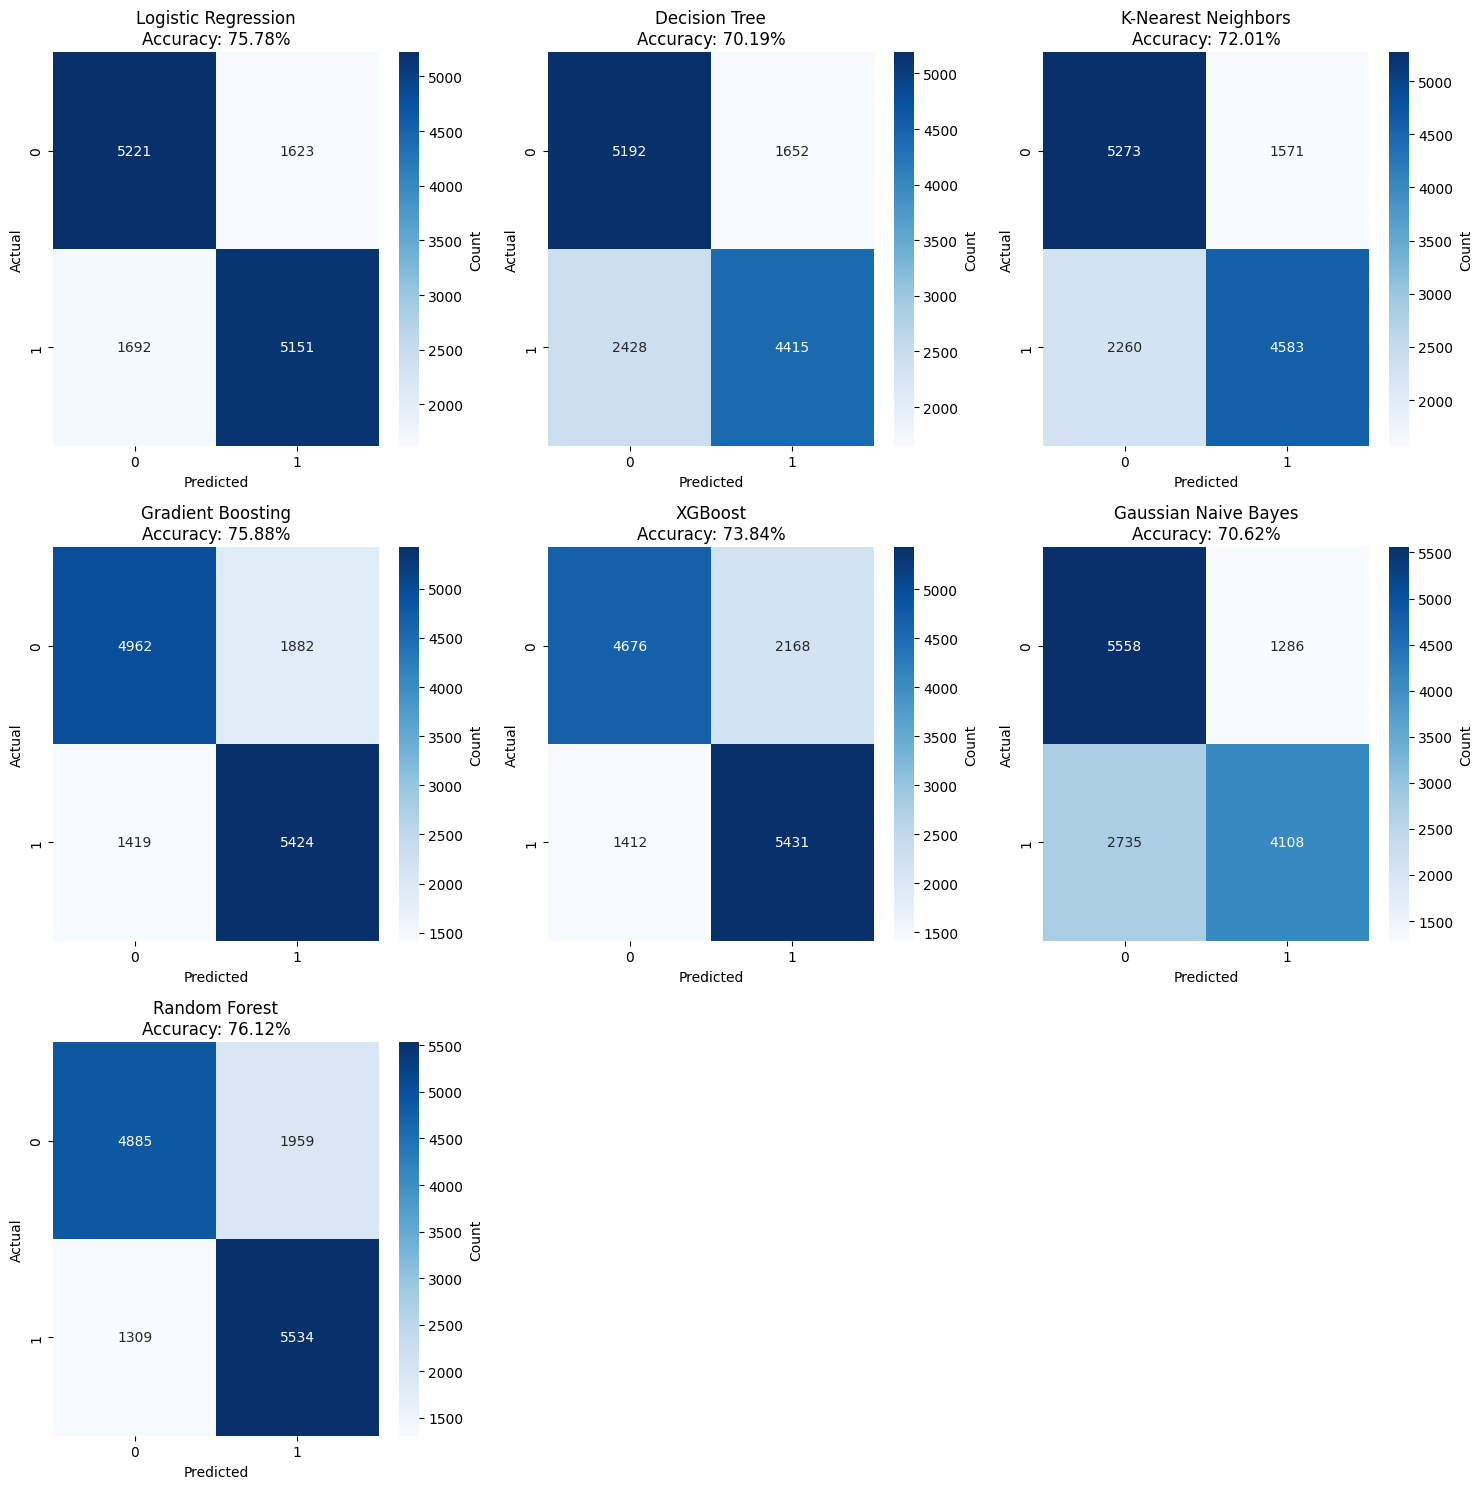

In [39]:
# Create confusion matrices for all models
from sklearn.metrics import confusion_matrix

# Calculate number of rows and columns for subplots
n_models = len(model_names)
n_cols = 3
n_rows = (n_models + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for idx, model_name in enumerate(model_names):
    cm = confusion_matrix(y_test, predictions[model_name])
    
    # Create heatmap
    sns.heatmap(
        cm, 
        annot=True, 
        fmt='d', 
        cmap='Blues',
        ax=axes[idx],
        cbar_kws={'label': 'Count'}
    )
    axes[idx].set_title(f'{model_name}\nAccuracy: {accuracy_scores[idx]:.2f}%')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

# Hide unused subplots
for idx in range(n_models, len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

### 5.2 Classification Reports
Detailed classification reports for each model.

In [40]:
# Print classification reports for all models
print("=" * 70)
print("CLASSIFICATION REPORTS")
print("=" * 70)

for model_name in model_names:
    print(f"\n{model_name}:")
    print("-" * 70)
    print(metrics.classification_report(y_test, predictions[model_name], 
                                        target_names=['No Heart Disease', 'Heart Disease']))
    print("=" * 70)

CLASSIFICATION REPORTS

Logistic Regression:
----------------------------------------------------------------------
                  precision    recall  f1-score   support

No Heart Disease       0.76      0.76      0.76      6844
   Heart Disease       0.76      0.75      0.76      6843

        accuracy                           0.76     13687
       macro avg       0.76      0.76      0.76     13687
    weighted avg       0.76      0.76      0.76     13687


Decision Tree:
----------------------------------------------------------------------
                  precision    recall  f1-score   support

No Heart Disease       0.68      0.76      0.72      6844
   Heart Disease       0.73      0.65      0.68      6843

        accuracy                           0.70     13687
       macro avg       0.70      0.70      0.70     13687
    weighted avg       0.70      0.70      0.70     13687


K-Nearest Neighbors:
----------------------------------------------------------------------
  

### 5.3 Feature Importance Analysis
Analyze which features are most important for the best performing model.

In [41]:
# Get feature importance from Random Forest (best tree-based model)
if 'Random Forest' in models:
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': models['Random Forest'].feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("Top 10 Most Important Features (Random Forest):")
    print("=" * 50)
    print(feature_importance.head(10).to_string(index=False))
    
    # Visualize feature importance
    fig = px.bar(
        feature_importance.head(15),
        x='Importance',
        y='Feature',
        orientation='h',
        title='Top 15 Feature Importance (Random Forest)',
        labels={'Importance': 'Importance Score', 'Feature': 'Feature'}
    )
    fig.update_layout(height=600, width=800)
    fig.show()

Top 10 Most Important Features (Random Forest):
       Feature  Importance
   AgeCategory    0.328623
     GenHealth    0.205025
           BMI    0.070208
   DiffWalking    0.064570
      Diabetic    0.053025
PhysicalHealth    0.052924
        Stroke    0.044443
           Sex    0.040828
     SleepTime    0.029465
       Smoking    0.024101


## 6. Summary and Conclusions

### Key Findings:
1. **Best Performing Model**: Based on F1-Score (which balances precision and recall)
2. **Most Important Features**: Features that contribute most to predictions
3. **Model Recommendations**: Which model to use for deployment

### Next Steps:
- Hyperparameter tuning for best model
- Cross-validation for more robust evaluation
- Feature engineering improvements
- Model deployment

In [42]:
# Find best model based on F1-Score
best_model_idx = results_df['F1-Score (%)'].idxmax()
best_model_name = results_df.loc[best_model_idx, 'Model']

print("=" * 70)
print("BEST MODEL SUMMARY")
print("=" * 70)
print(f"Best Model: {best_model_name}")
print(f"Accuracy: {results_df.loc[best_model_idx, 'Accuracy (%)']:.2f}%")
print(f"Recall: {results_df.loc[best_model_idx, 'Recall (%)']:.2f}%")
print(f"Precision: {results_df.loc[best_model_idx, 'Precision (%)']:.2f}%")
print(f"F1-Score: {results_df.loc[best_model_idx, 'F1-Score (%)']:.2f}%")
print("=" * 70)

# Display top 3 models
print("\nTop 3 Models (by F1-Score):")
print("=" * 70)
print(results_df.head(3).to_string(index=False))
print("=" * 70)

BEST MODEL SUMMARY
Best Model: Random Forest
Accuracy: 76.12%
Recall: 80.87%
Precision: 73.86%
F1-Score: 77.20%

Top 3 Models (by F1-Score):
              Model  Accuracy (%)  Recall (%)  Precision (%)  F1-Score (%)
      Random Forest     76.123329   80.870963      73.855599     77.204241
  Gradient Boosting     75.882224   79.263481      74.240350     76.669729
Logistic Regression     75.779937   75.274003      76.040744     75.655431


/home/ahmedsta/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/ahmedsta/.local/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain fea